# Homework 3

# Load data

In [1]:
import json

In [10]:
d1 = json.load(open('logs/data5-stanley.json'))
d2 = json.load(open('logs/data5-pure.json'))
d3 = json.load(open('logs/data0.3-stanley.json'))
d4 = json.load(open('logs/data0.3-pure.json'))

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

In [12]:
duration = 50
Ts = 0.03

# Data Analysis

I will use as an error estimation just a norm of the distance between trajectories for each simulation step. In order to do so, I will interpolate the reference trajectory.

I have 3 error graphs.

- **Integration vs Odometry** - how our estimation differs from the real car position
- **Integration vs Reference** - how our estimation differs from the desired trajectory
- **Odometry vs Reference** - how real position of the car differs from the desired trajectory

I have desided to choose quite simple trajectory for tracking. It is just amplified square root of $x$.

## 0.3 m/s

### Plots

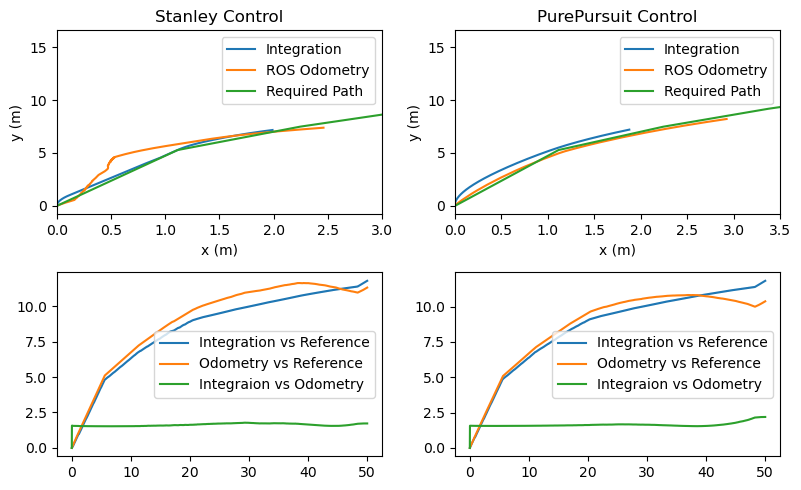

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(8, 5))
ax1, ax2, ax3, ax4 = ax.flatten()

qs = np.array([d3['qs']]).squeeze()
rqs = np.array([d3['rqs']]).squeeze()
ref = np.array([d3['cp']]).squeeze()
temp = interpolate.interp1d(ref[:, 0], ref[:, 1])
x = np.linspace(0, np.max(ref[:, 0]), len(qs))
ref = np.array([x, temp(x)]).T
eqs = [np.linalg.norm(u - v[0:2]) for u, v in zip(ref, qs)]
erqs = [np.linalg.norm(u - v[0:2]) for u, v in zip(ref, rqs)]
ei = [np.linalg.norm(u - v) for u, v in zip(qs, rqs)]
ts = np.linspace(0, duration, len(qs))


ax1.plot(qs[:, 0], qs[:, 1], label='Integration')
ax1.plot(rqs[:, 0], rqs[:, 1], label='ROS Odometry')
ax1.plot(ref[:, 0], ref[:, 1], label='Required Path')

ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_xlim([0, 3])
ax1.set_title('Stanley Control')

ax3.plot(ts, eqs, label='Integration vs Reference')
ax3.plot(ts, erqs, label='Odometry vs Reference')
ax3.plot(ts, ei, label='Integraion vs Odometry')

qs = np.array([d4['qs']]).squeeze()
rqs = np.array([d4['rqs']]).squeeze()
ref = np.array([d3['cp']]).squeeze()
temp = interpolate.interp1d(ref[:, 0], ref[:, 1])
x = np.linspace(0, np.max(ref[:, 0]), len(qs))
ref = np.array([x, temp(x)]).T
eqs = [np.linalg.norm(u - v[0:2]) for u, v in zip(ref, qs)]
erqs = [np.linalg.norm(u - v[0:2]) for u, v in zip(ref, rqs)]
ei = [np.linalg.norm(u - v) for u, v in zip(qs, rqs)]
ts = np.linspace(0, duration, len(qs))


ax2.plot(qs[:, 0], qs[:, 1], label='Integration')
ax2.plot(rqs[:, 0], rqs[:, 1], label='ROS Odometry')
ax2.plot(ref[:, 0], ref[:, 1], label='Required Path')

ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.set_xlim([0, 3.5])
ax2.set_title('PurePursuit Control')


ax4.plot(ts, eqs, label='Integration vs Reference')
ax4.plot(ts, erqs, label='Odometry vs Reference')
ax4.plot(ts, ei, label='Integraion vs Odometry')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.tight_layout()
plt.show()

### Analysis

Even though velocity of the car was relatively small, we can clearly see that odometry and integration results are quite different. It is because during the path tracking we can not accurately estimate angle and angular velocity through steering angle. With small velocity it is fine, but further we will see how much worse results become.

Also we can see, that pure pursuit give more stable results. It is due to the fact that
our errors and implementation of Stanley Control force it to show more oscillating behaviour. As a result, we can see how it tries constantly to adjust an angle in the
beginning.

## 5 m/s

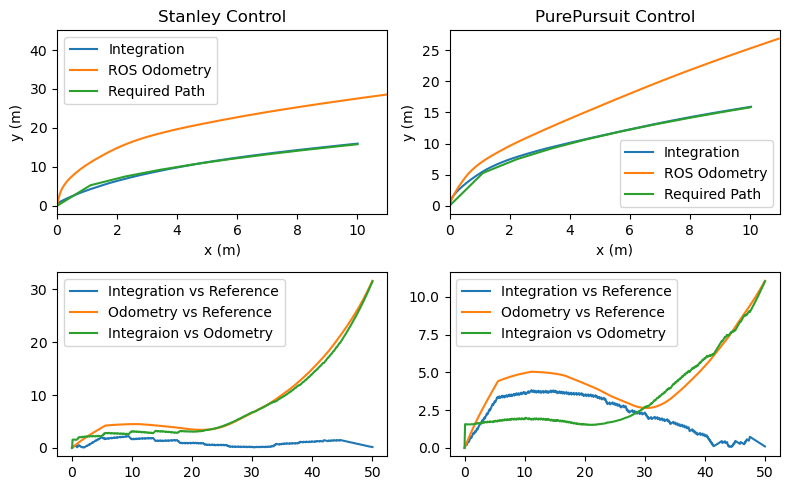

In [61]:
fig, ax = plt.subplots(2, 2, figsize=(8, 5))
ax1, ax2, ax3, ax4 = ax.flatten()

qs = np.array([d1['qs']]).squeeze()
rqs = np.array([d1['rqs']]).squeeze()
ref = np.array([d1['cp']]).squeeze()
temp = interpolate.interp1d(ref[:, 0], ref[:, 1])
x = np.linspace(0, np.max(ref[:, 0]), len(qs))
ref = np.array([x, temp(x)]).T
eqs = [np.linalg.norm(u - v[0:2]) for u, v in zip(ref, qs)]
erqs = [np.linalg.norm(u - v[0:2]) for u, v in zip(ref, rqs)]
ei = [np.linalg.norm(u - v) for u, v in zip(qs, rqs)]
ts = np.linspace(0, duration, len(qs))


ax1.plot(qs[:, 0], qs[:, 1], label='Integration')
ax1.plot(rqs[:, 0], rqs[:, 1], label='ROS Odometry')
ax1.plot(ref[:, 0], ref[:, 1], label='Required Path')

ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_xlim([0, 11])
ax1.set_title('Stanley Control')

ax3.plot(ts, eqs, label='Integration vs Reference')
ax3.plot(ts, erqs, label='Odometry vs Reference')
ax3.plot(ts, ei, label='Integraion vs Odometry')

qs = np.array([d2['qs']]).squeeze()
rqs = np.array([d2['rqs']]).squeeze()
ref = np.array([d2['cp']]).squeeze()
temp = interpolate.interp1d(ref[:, 0], ref[:, 1])
x = np.linspace(0, np.max(ref[:, 0]), len(qs))
ref = np.array([x, temp(x)]).T
eqs = [np.linalg.norm(u - v[0:2]) for u, v in zip(ref, qs)]
erqs = [np.linalg.norm(u - v[0:2]) for u, v in zip(ref, rqs)]
ei = [np.linalg.norm(u - v) for u, v in zip(qs, rqs)]
ts = np.linspace(0, duration, len(qs))


ax2.plot(qs[:, 0], qs[:, 1], label='Integration')
ax2.plot(rqs[:, 0], rqs[:, 1], label='ROS Odometry')
ax2.plot(ref[:, 0], ref[:, 1], label='Required Path')

ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.set_xlim([0, 11])
ax2.set_title('PurePursuit Control')


ax4.plot(ts, eqs, label='Integration vs Reference')
ax4.plot(ts, erqs, label='Odometry vs Reference')
ax4.plot(ts, ei, label='Integraion vs Odometry')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.tight_layout()
plt.show()

As we can see, now both approaches show quite similar results. Moreover, integration shows convergence to the desired trajectory. However, the issue is that integration does not yield correct results and due to high velocity and estimation errors, real odometry
and estimation has a very different results.

## Conclusion

We can see, that our algorithms demonstrate relatively good convergence to the desired trajectory. However this convergence is satisfied for estimated positions, but real vehicle position differs quite a lot from the estimation. I believe that the reason for this is error accumulation. Even if our algorithm will be insensitive to small errors, step by step simulation accumulates errors between steps. I could see it when I increased reference path segments. As a result, it is quite difficult to control a system without any real sensor readings due to high sensitivity to estimation errors.